In [1]:
%matplotlib inline
import copy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torch

In [3]:

from segmentation.model import SegmentationMask, MaskTuple
from combining_data.visualize_seg import build2dLungMask
from utill.util import xyz2irc

In [4]:
from combining_data.segm_data import getCandidatesList, getCt

In [5]:
candidateInfo_list = getCandidatesList(reqOnDisk=True)
candidateInfo_list[0]

CandidateTuple(isNodule_bool=True, hasAnnotation_bool=True, isMal_bool=True, diameter_mm=25.23320204, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.511347030803753100045216493273', center_xyz=(60.77506053, 74.1239696, -214.7823466))

In [6]:
series_list = sorted(set(t.series_uid for t in candidateInfo_list))

In [7]:
def transparent_cmap(cmap, N=255):
    "Copy colormap and set alpha values"

    mycmap = copy.deepcopy(cmap)
    mycmap._init()
    mycmap._lut[:,-1] = np.linspace(0, 0.75, N+4)
    return mycmap
tgray = transparent_cmap(plt.cm.gray)
tpurp = transparent_cmap(plt.cm.Purples)
tblue = transparent_cmap(plt.cm.Blues)
tgreen = transparent_cmap(plt.cm.Greens)
torange = transparent_cmap(plt.cm.Oranges)
tred = transparent_cmap(plt.cm.Reds)


clim=(0, 1.3)
start_ndx = 3
mask_model = SegmentationMask().to('cuda')

In [8]:
ct_list = []
for nit_ndx in range(start_ndx, start_ndx+3):
    candidateInfo_tup = candidateInfo_list[nit_ndx]
    ct = getCt(candidateInfo_tup.series_uid)
    center_irc = xyz2irc(candidateInfo_tup.center_xyz, ct.origin_xyz, ct.voxSize_xyz, ct.direction_arr)
    
    ct_list.append((ct, center_irc))


['../data\\subset0\\1.3.6.1.4.1.14519.5.2.1.6279.6001.202811684116768680758082619196.mhd']
['../data\\subset0\\1.3.6.1.4.1.14519.5.2.1.6279.6001.187451715205085403623595258748.mhd']
['../data\\subset0\\1.3.6.1.4.1.14519.5.2.1.6279.6001.137763212752154081977261297097.mhd']


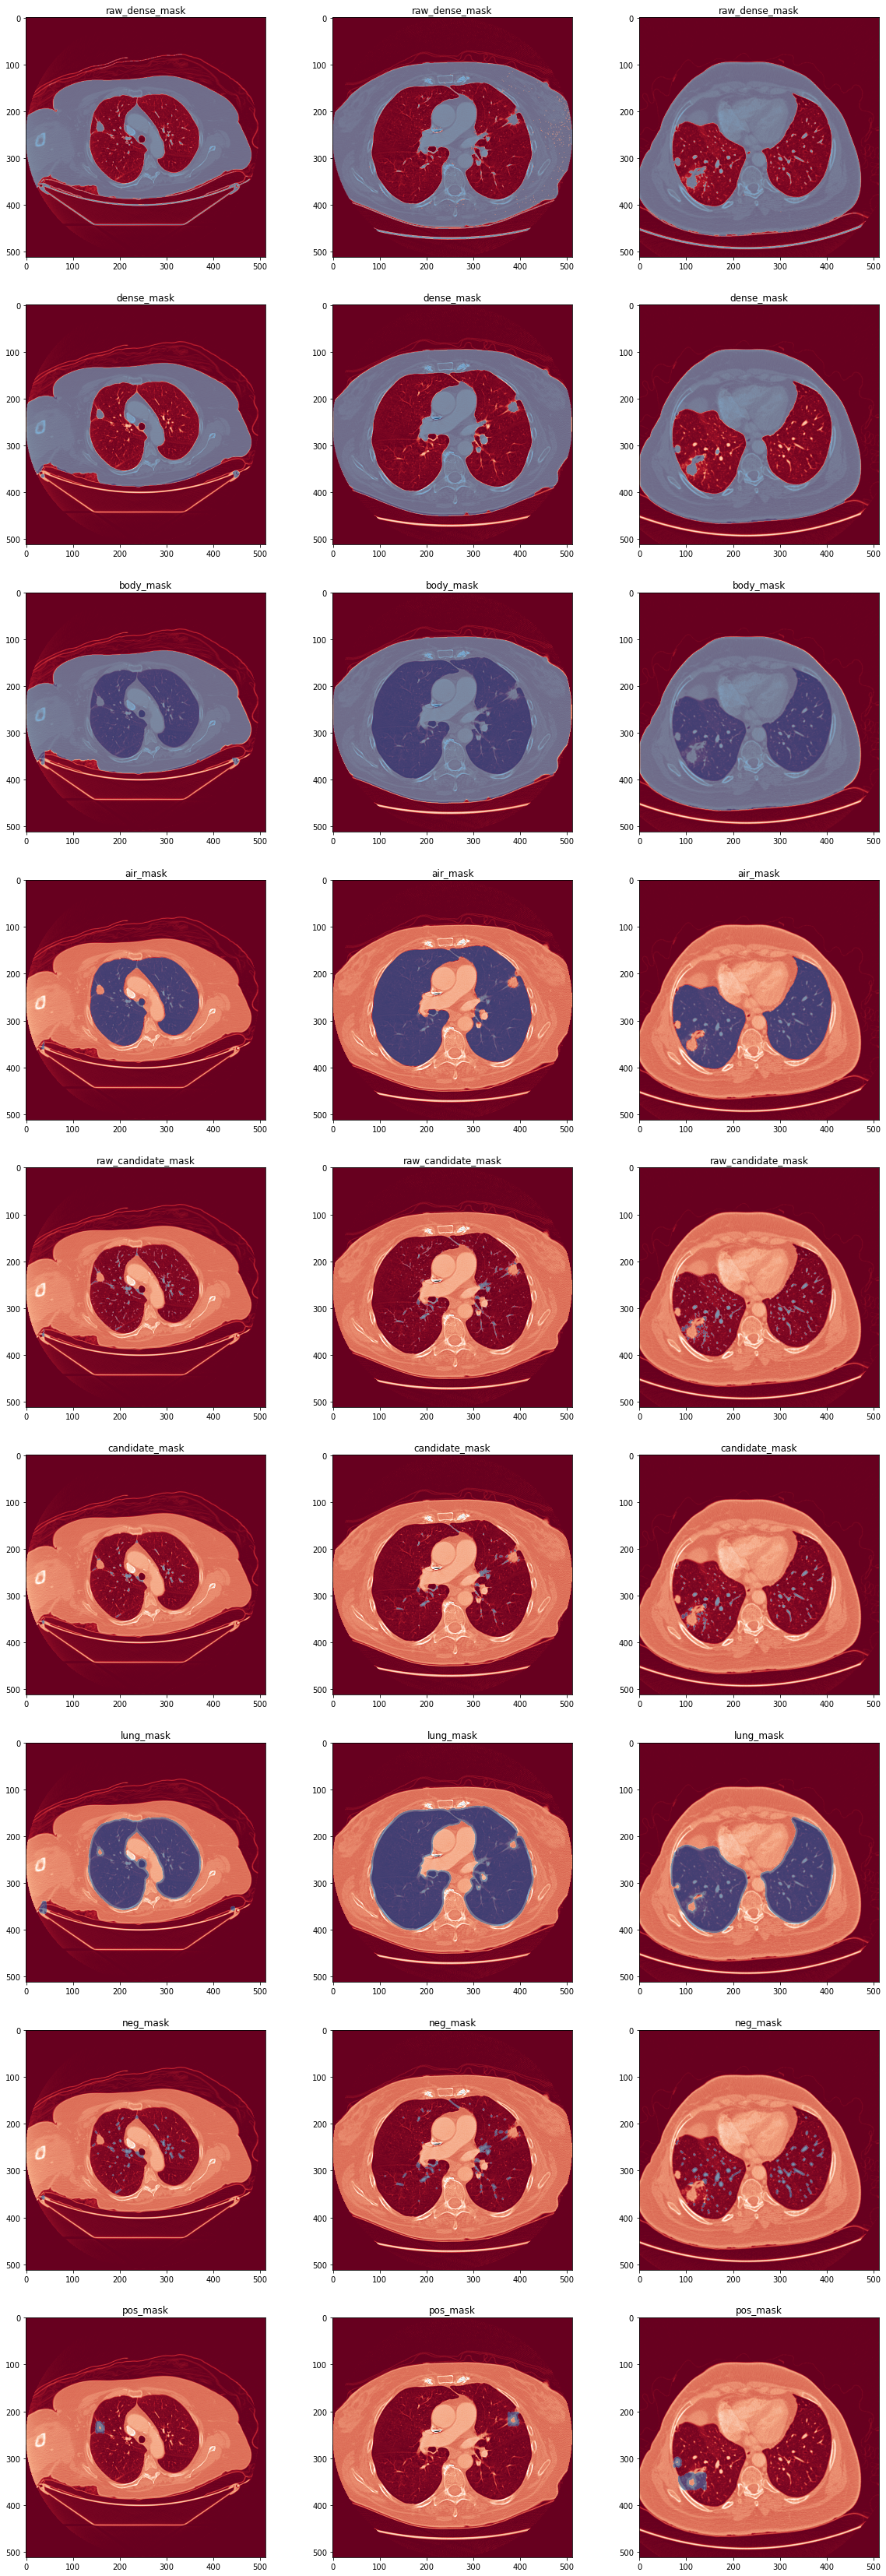

In [28]:
start_ndx = nit_ndx + 1

fig = plt.figure(figsize=(20,60))
subplot_ndx = 0 
for ct_ndx, (ct, center_irc) in enumerate(ct_list):
    mask_tup = build2dLungMask(ct.series_uid, int(center_irc.index))
    
#    ct_g = torch.from_numpy(ct.hunits_arr[int(center_irc.index)].astype(np.float32)).unsqueeze(0).unsqueeze(0).to('cuda')
#    pos_g = torch.from_numpy(ct.positive_mask[int(center_irc.index)].astype(np.float32)).unsqueeze(0).unsqueeze(0).to('cuda')
#    input_g = ct_g / 1000
    
#    label_g, neg_g, pos_g, lung_mask, mask_dict = mask_model(input_g, pos_g)
#    mask_tup = MaskTuple(**mask_dict)
    for attr_ndx, attr_str in enumerate(mask_tup._fields):

        subplot_ndx = 1 + 3 * attr_ndx +  ct_ndx
        subplot = fig.add_subplot(len(mask_tup), len(ct_list), subplot_ndx)
        subplot.set_title(attr_str)
        
        
        #print(layer_func, ct.hunits_arr.shape, layer_func(ct, mask_tup, int(center_irc.index)).shape, center_irc.index)

        plt.imshow(ct.hunits_arr[int(center_irc.index)], clim=(-1000, 3000), cmap='RdGy')
        plt.imshow(mask_tup[attr_ndx][0][0].cpu(), clim=clim, cmap=tblue)

        # subplot = fig.add_subplot(len(mask_tup), len(ct_list)*2, subplot_ndx+1)
        # subplot.set_title('old '+ attr_str)

        # plt.imshow(ct.hunits_arr[int(center_irc.index)], clim=(-1000, 3000), cmap='RdGy')
        # plt.imshow(old_tup[attr_ndx], clim=clim, cmap=tblue)
        
        #if attr_ndx == 1: break
    #break

In [16]:
len(ct_list)

3

In [17]:
len(mask_tup)

9

In [22]:
mask_tup._fields

('raw_dense_mask',
 'dense_mask',
 'body_mask',
 'air_mask',
 'raw_candidate_mask',
 'candidate_mask',
 'lung_mask',
 'neg_mask',
 'pos_mask')

['../data\\subset0\\1.3.6.1.4.1.14519.5.2.1.6279.6001.511347030803753100045216493273.mhd']
CandidateTuple(isNodule_bool=True, hasAnnotation_bool=True, isMal_bool=True, diameter_mm=25.23320204, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.511347030803753100045216493273', center_xyz=(60.77506053, 74.1239696, -214.7823466)) center_irc IrcTuple(index=67, row=384, col=345)
['../data\\subset0\\1.3.6.1.4.1.14519.5.2.1.6279.6001.511347030803753100045216493273.mhd']
0.00405120849609375


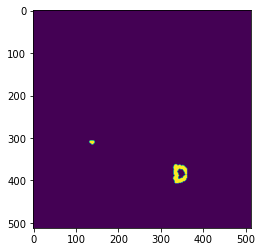

In [29]:
nit_ndx = 0
candidateInfo_tup = candidateInfo_list[nit_ndx]
ct = getCt(candidateInfo_tup.series_uid)
center_irc = xyz2irc(candidateInfo_tup.center_xyz, ct.origin_xyz, ct.voxSize_xyz, ct.direction_arr)
print(candidateInfo_tup, 'center_irc', center_irc)

mask_tup = build2dLungMask(ct.series_uid, int(center_irc.index))
mask_tup = mask_tup._make(x.cpu().numpy()[0][0] for x in mask_tup)

print(mask_tup.pos_mask.sum() / (512*512))

plt.imshow(mask_tup.pos_mask)

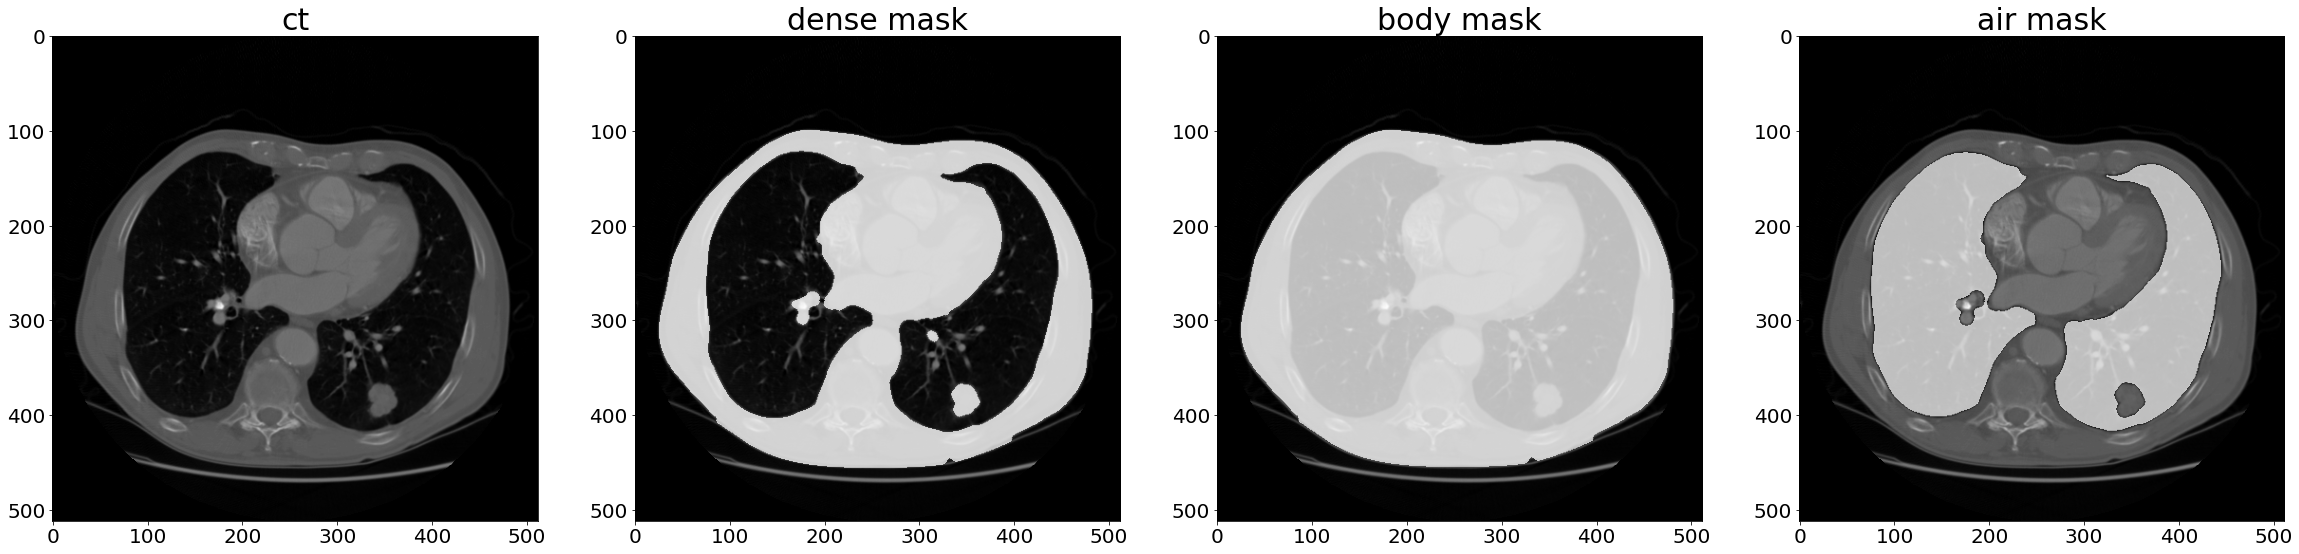

In [30]:
fig = plt.figure(figsize=(40,10))

subplot = fig.add_subplot(1, 4, 1)
subplot.set_title('ct', fontsize=30)
for label in (subplot.get_xticklabels() + subplot.get_yticklabels()):
    label.set_fontsize(20)
plt.imshow(ct.hunits_arr[int(center_irc.index)], clim=(-1000, 2000), cmap='gray')

subplot = fig.add_subplot(1, 4, 2)
subplot.set_title('dense mask', fontsize=30)
for label in (subplot.get_xticklabels() + subplot.get_yticklabels()):
    label.set_fontsize(20)
plt.imshow(ct.hunits_arr[int(center_irc.index)], clim=(-1000, 2000), cmap='gray')
plt.imshow(mask_tup.dense_mask, clim=(0,1), cmap=tgray)

subplot = fig.add_subplot(1, 4, 3)
subplot.set_title('body mask', fontsize=30)
for label in (subplot.get_xticklabels() + subplot.get_yticklabels()):
    label.set_fontsize(20)
plt.imshow(ct.hunits_arr[int(center_irc.index)], clim=(-1000, 2000), cmap='gray')
plt.imshow(mask_tup.body_mask, clim=(0,1), cmap=tgray)

subplot = fig.add_subplot(1, 4, 4)
subplot.set_title('air mask', fontsize=30)
for label in (subplot.get_xticklabels() + subplot.get_yticklabels()):
    label.set_fontsize(20)
plt.imshow(ct.hunits_arr[int(center_irc.index)], clim=(-1000, 2000), cmap='gray')
plt.imshow(mask_tup.air_mask, clim=(0,1), cmap=tgray)

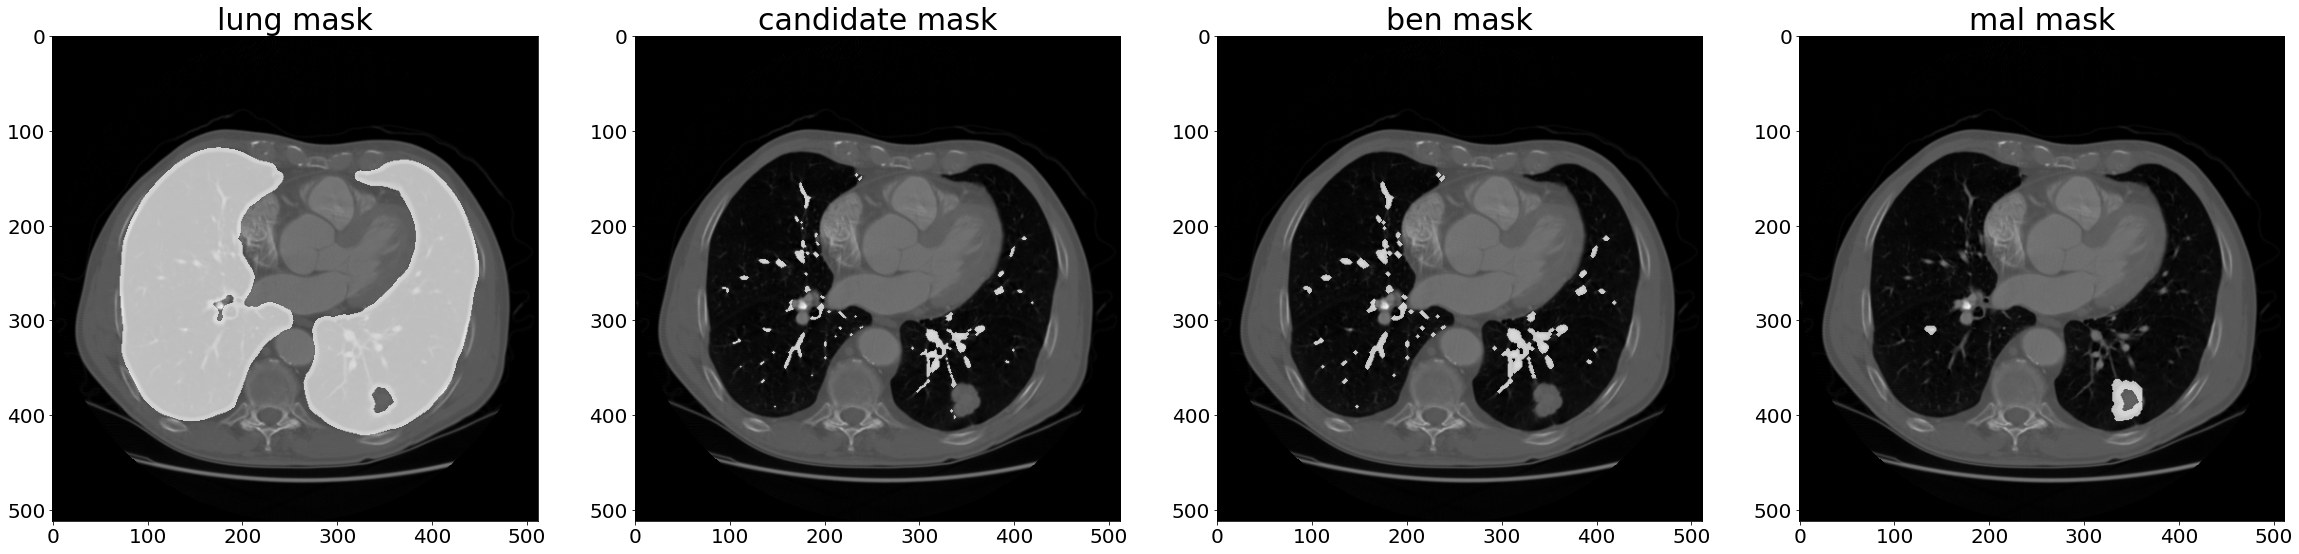

In [31]:
fig = plt.figure(figsize=(40,10))

subplot = fig.add_subplot(1, 4, 1)
subplot.set_title('lung mask', fontsize=30)
for label in (subplot.get_xticklabels() + subplot.get_yticklabels()):
    label.set_fontsize(20)
plt.imshow(ct.hunits_arr[int(center_irc.index)], clim=(-1000, 2000), cmap='gray')
plt.imshow(mask_tup.lung_mask, clim=(0,1), cmap=tgray)

subplot = fig.add_subplot(1, 4, 2)
subplot.set_title('candidate mask', fontsize=30)
for label in (subplot.get_xticklabels() + subplot.get_yticklabels()):
    label.set_fontsize(20)
plt.imshow(ct.hunits_arr[int(center_irc.index)], clim=(-1000, 2000), cmap='gray')
plt.imshow(mask_tup.candidate_mask, clim=(0,1), cmap=tgray)

subplot = fig.add_subplot(1, 4, 3)
subplot.set_title('ben mask', fontsize=30)
for label in (subplot.get_xticklabels() + subplot.get_yticklabels()):
    label.set_fontsize(20)
plt.imshow(ct.hunits_arr[int(center_irc.index)], clim=(-1000, 2000), cmap='gray')
plt.imshow(mask_tup.neg_mask, clim=(0,1), cmap=tgray)

subplot = fig.add_subplot(1, 4, 4)
subplot.set_title('mal mask', fontsize=30)
for label in (subplot.get_xticklabels() + subplot.get_yticklabels()):
    label.set_fontsize(20)
plt.imshow(ct.hunits_arr[int(center_irc.index)], clim=(-1000, 2000), cmap='gray')
plt.imshow(mask_tup.pos_mask, clim=(0,1), cmap=tgray)

CandidateTuple(isNodule_bool=True, hasAnnotation_bool=True, isMal_bool=True, diameter_mm=21.58311204, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.905371958588660410240398317235', center_xyz=(109.1166375, 48.58951079, -120.8920582)) center_irc IrcTuple(index=111, row=320, col=390)
['../data\\subset0\\1.3.6.1.4.1.14519.5.2.1.6279.6001.905371958588660410240398317235.mhd']


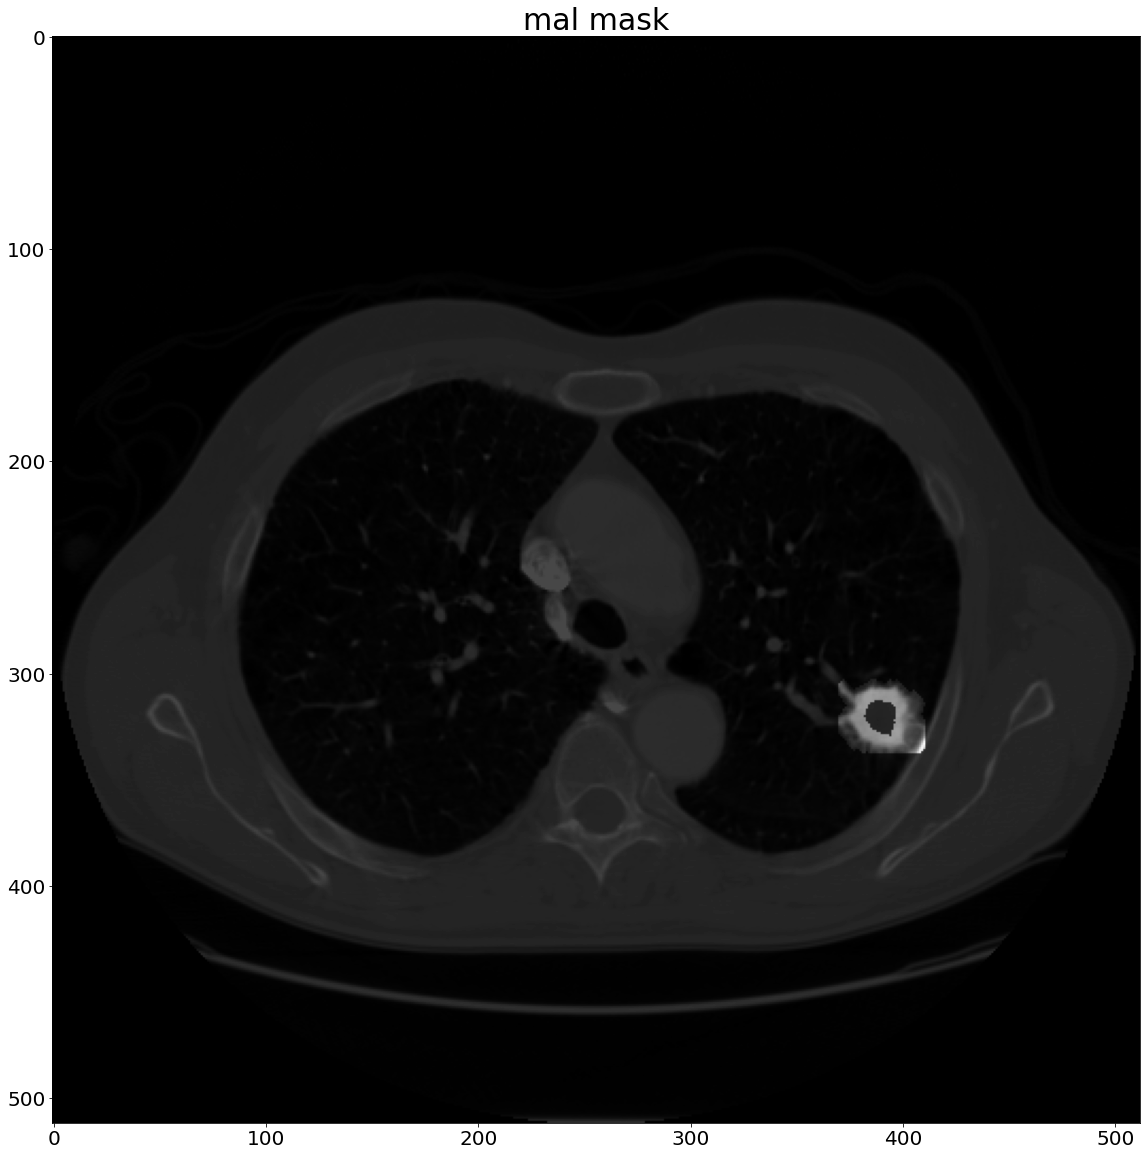

In [33]:
nit_ndx = 1
candidateInfo_tup = candidateInfo_list[nit_ndx]
ct = getCt(candidateInfo_tup.series_uid)
center_irc = xyz2irc(candidateInfo_tup.center_xyz, ct.origin_xyz, ct.voxSize_xyz, ct.direction_arr)
print(candidateInfo_tup, 'center_irc', center_irc)

mask_tup = build2dLungMask(ct.series_uid, int(center_irc.index))
mask_tup = mask_tup._make(x.cpu().numpy()[0][0] for x in mask_tup)


fig = plt.figure(figsize=(20,20))

slice_a = ((ct.hunits_arr[int(center_irc.index)] / 1000) + 1) / 2
slice_a = slice_a.clip(0, 1)

subplot = fig.add_subplot(1, 1, 1)
subplot.set_title('mal mask', fontsize=30)
for label in (subplot.get_xticklabels() + subplot.get_yticklabels()):
    label.set_fontsize(20)
plt.imshow(
    slice_a + 3 * slice_a * mask_tup.pos_mask, 
    #clim=(-2000, 2000), 
    cmap='gray',
)

In [ ]:
# sample_ndx = 40

# #while train_dl.dataset[sample_ndx][1][0]:
# #    sample_ndx += 1

# fig = plt.figure(figsize=(40,10))

# candidate_t, pos_t, series_uid, center_irc = train_dl.dataset[sample_ndx]
# subplot = fig.add_subplot(1, 4, 1)
# subplot.set_title('augmented nodule 1', fontsize=30)
# plt.imshow(candidate_t[0,12], clim=(-1000, 500), cmap='gray')

# candidate_t, pos_t, series_uid, center_irc = train_dl.dataset[sample_ndx]
# subplot = fig.add_subplot(1, 4, 2)
# subplot.set_title('augmented nodule 2', fontsize=30)
# plt.imshow(candidate_t[0,12], clim=(-1000, 500), cmap='gray')

# candidate_t, pos_t, series_uid, center_irc = train_dl.dataset[sample_ndx]
# subplot = fig.add_subplot(1, 4, 3)
# subplot.set_title('augmented nodule 3', fontsize=30)
# plt.imshow(candidate_t[0,12], clim=(-1000, 500), cmap='gray')

# candidate_t, pos_t, series_uid, center_irc = train_dl.dataset[sample_ndx]
# subplot = fig.add_subplot(1, 4, 4)
# subplot.set_title('augmented nodule 4', fontsize=30)
# plt.imshow(candidate_t[0,12], clim=(-1000, 500), cmap='gray')


# print([sample_ndx, pos_t, series_uid, center_irc])

2022-05-24 14:41:50,163 INFO     pid:2680 combining_data.segm_data:293:__init__ <combining_data.segm_data.TrainingLuna2dSegmentationDataset object at 0x0000026A6E59BD60>: 89 general series, 971 slices, 112 nodules


1 done
2 done


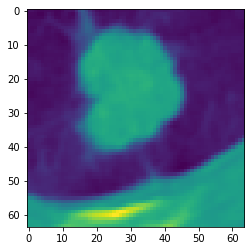

In [10]:
from combining_data.segm_data import TrainingLuna2dSegmentationDataset
print("1 done")
ds = TrainingLuna2dSegmentationDataset(contextSlices_count=3)
print("2 done")

input_t, raw_pos_t, series_uid, ct_ndx = ds[0]

plt.imshow(input_t[3])